In [0]:
from google.colab import files
uploaded = files.upload()


Saving robberies.csv to robberies.csv


In [1]:
import pandas as pd
#split data time series ke Dataset dan data validitas
series = pd.Series.from_csv('robberies.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:(len(series))-1]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
#simpan kedua data (opsional)
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 107, Validation 11


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


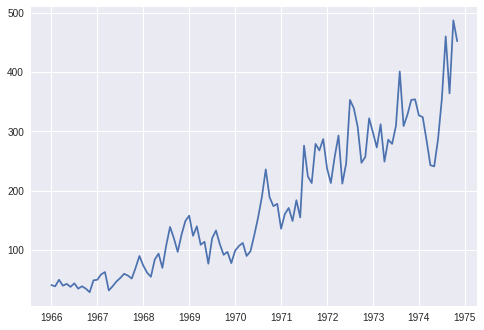

In [2]:
from matplotlib import pyplot as plt
series = pd.Series.from_csv('dataset.csv')
series.plot()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


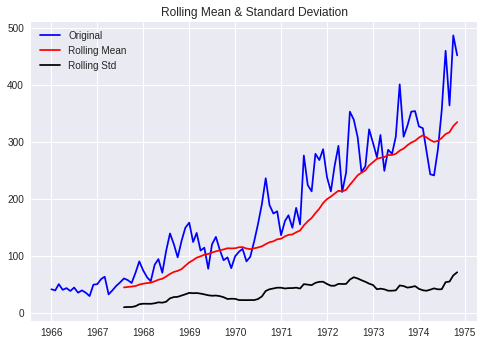

In [3]:
rolmean = pd.rolling_mean(series, window=20)
rolstd = pd.rolling_std(series, window=20)
#Plot rolling statistics:
orig = plt.plot(series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [0]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('Lags used: %f' % result[2])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.755269
Lags used: 12.000000
p-value: 0.990879
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583


In [0]:
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return pd.Series(diff)

X = series.values

stationary = difference(X)
stationary.index = series.index[1:]

result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

stationary.to_csv('stationary.csv')

ADF Statistic: -4.077083
p-value: 0.001057
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


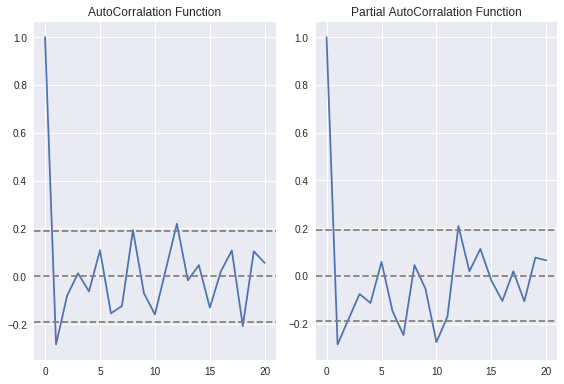

In [0]:
from statsmodels.tsa.stattools import acf, pacf

series = pd.Series.from_csv('stationary.csv')
lag_acf = acf(series, nlags=20)
lag_pacf = pacf(series, nlags=20)


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0,linestyle='--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(series)),linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(series)),linestyle='--', color = 'gray')
plt.title('AutoCorralation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0,linestyle='--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(series)),linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(series)),linestyle='--', color = 'gray')
plt.title('Partial AutoCorralation Function')
plt.tight_layout()

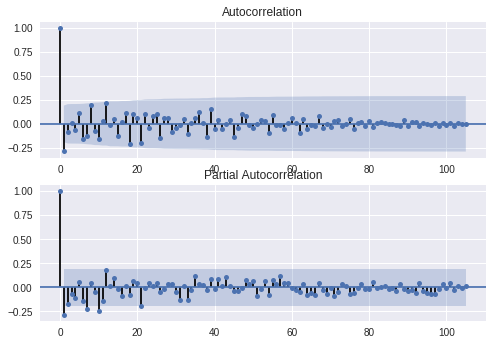

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

series = pd.Series.from_csv('dataset.csv')

# mempersiapkan data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# menguji validitas menggunakan walk-fordward method
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# mencoba - coba dengan model ARIMA(0,1,2) atau model MA(2)
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observasi
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# tampilkan performansi
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/k

>Predicted=102.710, Expected=125
>Predicted=118.868, Expected=155
>Predicted=141.099, Expected=190
>Predicted=176.593, Expected=236
>Predicted=233.418, Expected=189
>Predicted=186.905, Expected=174
>Predicted=184.846, Expected=178
>Predicted=183.763, Expected=136
>Predicted=146.180, Expected=161
>Predicted=171.279, Expected=171
>Predicted=170.196, Expected=149
>Predicted=154.425, Expected=184
>Predicted=185.708, Expected=155
>Predicted=157.284, Expected=276
>Predicted=245.280, Expected=224
>Predicted=222.242, Expected=213
>Predicted=219.698, Expected=279
>Predicted=261.506, Expected=268
>Predicted=264.287, Expected=287
>Predicted=282.759, Expected=238
>Predicted=255.843, Expected=213
>Predicted=235.189, Expected=257
>Predicted=257.622, Expected=293
>Predicted=280.345, Expected=212
>Predicted=235.564, Expected=246
>Predicted=255.342, Expected=353
>Predicted=318.613, Expected=339
>Predicted=310.335, Expected=308
>Predicted=306.789, Expected=247
>Predicted=270.213, Expected=257
>Predicted

In [0]:
import warnings

def evaluate_arima_model(X, arima_order):
	# prepare training data_set
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# prediksi
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# hitung error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# fungsi mencari p, d dan q terbaik dari ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 

#evaluasi parameter
p_values = range(0,13)
d_values = range(0, 1)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(1, 0, 0) MSE=52.855


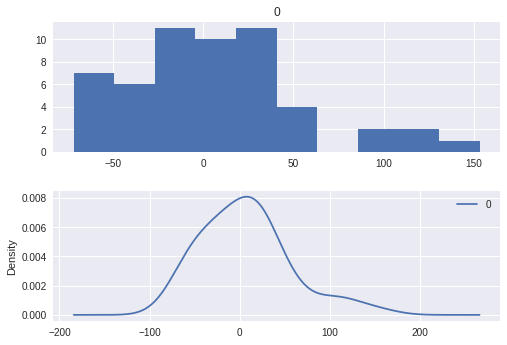

In [0]:
# tahap akhir cek residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

Lambda: 0.253936


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:900: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


(array([10., 12.,  8., 14., 11., 10., 11., 17., 10.,  4.]),
 array([ 5.32243633,  6.29194908,  7.26146183,  8.23097458,  9.20048733,
        10.17000008, 11.13951283, 12.10902557, 13.07853832, 14.04805107,
        15.01756382]),
 <a list of 10 Patch objects>)

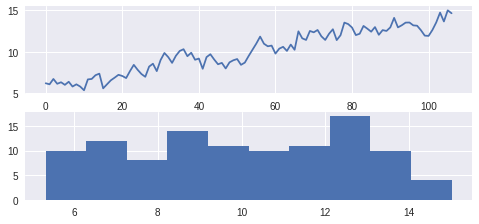

In [0]:
from scipy.stats import boxcox

transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
plt.figure(1)
# line plot
plt.subplot(311)
plt.plot(transformed)
# histogram
plt.subplot(312)
plt.hist(transformed)


In [0]:
from statsmodels.tsa.arima_model import ARIMA

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

model = ARIMA(transformed, order=(0,1,2))
model_fit = model.fit(disp=0)
# save model
model_fit.save('model.pkl')
np.save('model_lambda.npy', [lam])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
#load data validitas
validation = pd.Series.from_csv('validation.csv')
data_validitas = validation.values.astype('float32')

print(data_validitas)

[391. 500. 451. 375. 372. 302. 316. 398. 394. 431. 431.]


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [0]:
#buat prediksi
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
from math import exp
from math import log
 
# fungsi untuk mengembalikan nilai tranformasi box-cox
def boxcox_inverse(value, lam):
	if lam == 0:
		return exp(value)
	return exp(log(lam * value + 1) / lam)
 
model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')
yhat = model_fit.forecast()[0]

dataset = pd.Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]

# load model                          
model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')

# buat prediksi pertama
predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
predictions.append(yhat)
history.append(data_validitas[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, data_validitas[0]))

# rolling forecasts
for i in range(1, len(data_validitas)):
	# transformasi
	transformed, lam = boxcox(history)
	if lam < -5:
		transformed, lam = history, 1
	# predict
	model = ARIMA(transformed, order=(0,1,2))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	# invers transformed prediction
	yhat = boxcox_inverse(yhat, lam)
	predictions.append(yhat)
	# observation
	obs = data_validitas[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# performansi
mse = mean_squared_error(data_validitas, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
yhat = boxcox_inverse(yhat, lam)
print('Predicted: %.3f' % yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:900: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In

>Predicted=423.088, Expected=391
>Predicted=408.378, Expected=500
>Predicted=482.454, Expected=451
>Predicted=445.944, Expected=375
>Predicted=413.882, Expected=372
>Predicted=413.209, Expected=302
>Predicted=355.159, Expected=316
>Predicted=363.515, Expected=398
>Predicted=406.365, Expected=394
>Predicted=394.186, Expected=431
>Predicted=428.174, Expected=431
RMSE: 55.438
Predicted: 6766324.457
